<a href="https://colab.research.google.com/github/TsabitaNurul/Tubes-ML/blob/main/Tubes_3_Skenario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TSABITA NURUL IZZAH - 201810370311082

ULFA ZAKIATUL MARDHIAH - 201810370311058

In [ ]:
!git clone https://github.com/TsabitaNurul/Tubes-ML.git

Cloning into 'Tubes-ML'...
remote: Enumerating objects: 27946, done.
remote: Counting objects: 100% (27946/27946), done.
remote: Compressing objects: 100% (27902/27902), done.
remote: Total 27946 (delta 26), reused 27946 (delta 26), pack-reused 0
Receiving objects: 100% (27946/27946), 345.38 MiB | 14.01 MiB/s, done.
Resolving deltas: 100% (26/26), done.
Checking out files: 100% (28012/28012), done.


In [ ]:
import numpy as np
import pandas as pd
import os
from shutil import copyfile

TRAIN_DIR = "/content/train/"
VALID_DIR ="/content/valid/"

os.mkdir(TRAIN_DIR)
os.mkdir(VALID_DIR)

for label in ['Uninfected', 'Parasitized']:
    os.mkdir(TRAIN_DIR+label)
    os.mkdir(VALID_DIR+label)

In [ ]:
import random
def train_valid_test_split(source, train_dir, valid_dir,train_size, valid_size):
    # get files
    files = []
    for filename in os.listdir(source):
        file = source + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
    
    # train valid split
    train_size = int(len(files) * (1-train_size))
    valid_size = int(len(files) * (train_size))
  
    # shuffle the dataset
    shuffled_files = random.sample(files, len(files))
    
    train_set = shuffled_files[train_size:]
    valid_set = shuffled_files[:train_size]
    
    for filename in train_set:
        filepath = source + filename
        destination = train_dir + filename
        copyfile(filepath, destination)    
    
    for filename in valid_set:
        filepath = source + filename
        destination = valid_dir + filename
        copyfile(filepath, destination)

SOURCE = "/content/Tubes-ML/Dataset/"

for label in ['Uninfected', 'Parasitized']:
    print(label)
    train_valid_test_split(SOURCE+label+'/', TRAIN_DIR +label+'/', VALID_DIR +label+'/', train_size=0.8, valid_size=0.2)
    print(len(os.listdir(TRAIN_DIR +label+'/')))
    print(len(os.listdir(VALID_DIR +label+'/')))

Uninfected
11025
2755
Parasitized
11025
2755


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size = (64, 64),
    color_mode='rgb',
    class_mode = 'binary',
    shuffle=True,
)

Found 22049 images belonging to 2 classes.


In [ ]:
valid_datagen = ImageDataGenerator(
      rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(
    VALID_DIR,
    target_size = (64, 64),
    color_mode='rgb',
    class_mode = 'binary',
    shuffle=True,
)

Found 5509 images belonging to 2 classes.


SKENARIO 1 ADAM

In [ ]:
# TULIS KODE ANDA DISINI
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 31, 31, 16)       0         
 g2D)                                                            
                                                                 
 dropout_45 (Dropout)        (None, 31, 31, 16)        0         
                                                                 
 batch_normalization_37 (Bat  (None, 31, 31, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_38 (Conv2D)          (None, 29, 29, 16)        2320      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 14, 16)      

In [ ]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_generator,
                   epochs = 100,
                   validation_data = valid_generator,
                   callbacks=[tf.keras.callbacks.ReduceLROnPlateau(
                       monitor='val_loss',
                       factor=0.5,
                       patience=40,
                       verbose = 1,
                       mode= 'auto',
                       cooldown = 1
                   )])

Epoch 1/100
690/690 [==============================] - 35s 49ms/step - loss: 0.6907 - accuracy: 0.5905 - val_loss: 0.6634 - val_accuracy: 0.5959 - lr: 1.0000e-04
Epoch 2/100
690/690 [==============================] - 33s 48ms/step - loss: 0.6414 - accuracy: 0.6421 - val_loss: 0.6169 - val_accuracy: 0.6691 - lr: 1.0000e-04
Epoch 3/100
690/690 [==============================] - 34s 49ms/step - loss: 0.6104 - accuracy: 0.6735 - val_loss: 0.5704 - val_accuracy: 0.7097 - lr: 1.0000e-04
Epoch 4/100
690/690 [==============================] - 34s 49ms/step - loss: 0.5694 - accuracy: 0.7082 - val_loss: 0.4912 - val_accuracy: 0.7549 - lr: 1.0000e-04
Epoch 5/100
690/690 [==============================] - 34s 50ms/step - loss: 0.4699 - accuracy: 0.7760 - val_loss: 0.4994 - val_accuracy: 0.7736 - lr: 1.0000e-04
Epoch 6/100
690/690 [==============================] - 34s 49ms/step - loss: 0.3401 - accuracy: 0.8572 - val_loss: 0.4517 - val_accuracy: 0.8305 - lr: 1.0000e-04
Epoch 7/100
690/690 [=======

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate(model):
  valid_generator = train_datagen.flow_from_directory(
      TRAIN_DIR, 
      target_size=(64,64), 
      batch_size=32, 
      class_mode='binary',
      shuffle = False)

  Y_pred = model.predict_generator(valid_generator)
  y_pred = np.round(Y_pred).astype(int)

  print('\nConfusion Matrix\n')
  cm = confusion_matrix(valid_generator.classes, y_pred)
  plt.figure(figsize=(8, 8))
  sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
  plt.xticks(ticks=[0.5, 1.5], labels=['Parasitized','Uninfected'])
  plt.yticks(ticks=[0.5, 1.5], labels=['Parasitized','Uninfected'])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  print('\n\nClassification Report\n')
  target_names = ['Parasitized','Uninfected']
  print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

  tn, fp, fn, tp = cm.ravel()

  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f = 2*((precision*recall)/(precision+recall))

  print("Recall of the model is {:.2f}".format(recall))
  print("Precision of the model is {:.2f}".format(precision))
  print("F-1 Score of the model is {:.2f}".format(f)) 

Found 22049 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]



Confusion Matrix



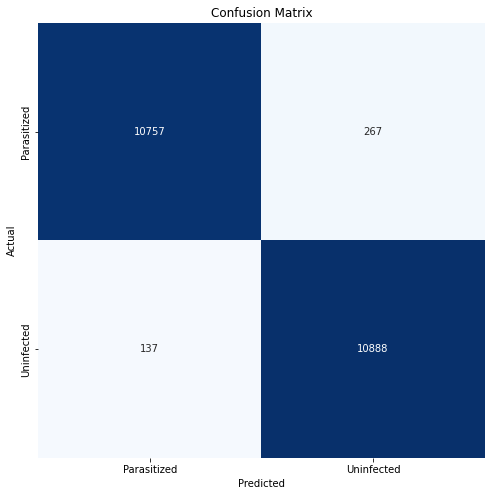



Classification Report

              precision    recall  f1-score   support

 Parasitized       0.99      0.98      0.98     11024
  Uninfected       0.98      0.99      0.98     11025

    accuracy                           0.98     22049
   macro avg       0.98      0.98      0.98     22049
weighted avg       0.98      0.98      0.98     22049

Recall of the model is 0.99
Precision of the model is 0.98
F-1 Score of the model is 0.98


In [ ]:
evaluate(model)

In [ ]:
import matplotlib.pyplot as plt
def eval_plot(history):

  plt.figure(figsize=(14, 5))

  # Accuracy plot
  plt.subplot(1, 2, 1)
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  acc_plot, = plt.plot(epochs, acc, 'r')
  val_acc_plot, = plt.plot(epochs, val_acc, 'b')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

  # Loss plot
  plt.subplot(1, 2, 2)
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'b')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

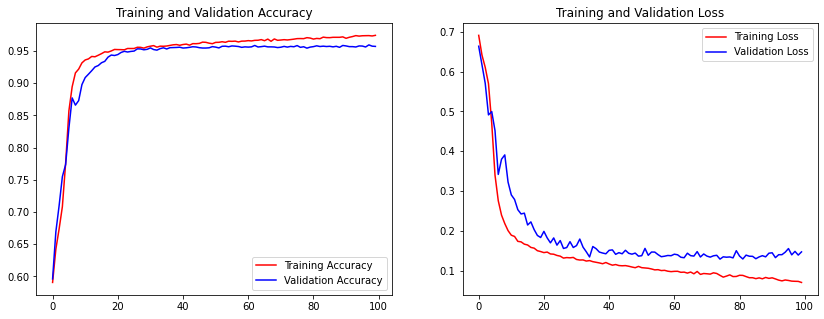

In [ ]:
eval_plot(history)

In [ ]:
model.save_weights("2 fully Adam Maxpool.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("2 fully Adam Maxpool.json", "w") as json_file: json_file.write(model_json)

In [ ]:
# serialize weights to HDF5
model.save("2 fully Adam Maxpool.h5")
print("Saved model to disk")

Saved model to disk


Model : 2 fully Adam Maxpool.h5
Predicted Label : Parasitized
Probability : 0.0003



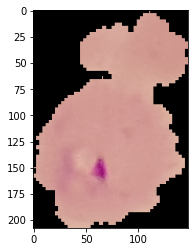

In [ ]:
from PIL import Image
import cv2

img_upload = Image.open("/content/Tubes-ML/Dataset/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png")
img_plt = plt.imshow(img_upload)
img = np.array(img_upload)
img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)

model_list = ['/content/2 fully Adam Maxpool.h5']
labels = ['Parasitized','Uninfected']

for m in model_list:
    model = load_model(m)
    imgs = cv2.resize(img, (64,64))
    imgs = imgs.astype('float32') / 255
    pred = model.predict(np.expand_dims(imgs, axis=0))[0]
    print('Model :', m.split('/')[-1])
    print('Predicted Label :',labels[((pred > 0.5)+0).ravel()[0]])
    print('Probability :',[ round(elem, 4) for elem in pred ][0])
    print('===============\n')

Model : 2 fully Adam Maxpool.h5
Predicted Label : Uninfected
Probability : 0.9851



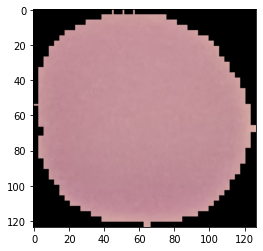

In [ ]:
from PIL import Image
import cv2

img_upload = Image.open("/content/Tubes-ML/Dataset/Uninfected/C114P75ThinF_IMG_20150930_150733_cell_62.png")
img_plt = plt.imshow(img_upload)
img = np.array(img_upload)
img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)

model_list = ['/content/2 fully Adam Maxpool.h5']
labels = ['Parasitized','Uninfected']

for m in model_list:
    model = load_model(m)
    imgs = cv2.resize(img, (64,64))
    imgs = imgs.astype('float32') / 255
    pred = model.predict(np.expand_dims(imgs, axis=0))[0]
    print('Model :', m.split('/')[-1])
    print('Predicted Label :',labels[((pred > 0.5)+0).ravel()[0]])
    print('Probability :',[ round(elem, 4) for elem in pred ][0])
    print('===============\n')

SKENARIO 2 NADAM

In [ ]:
# TULIS KODE ANDA DISINI
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Print model summary
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 31, 31, 16)        0         
                                                                 
 batch_normalization_3 (Batc  (None, 31, 31, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 16)        2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)      

In [ ]:
# Compile model
from tensorflow.keras.optimizers import Nadam

model2.compile(optimizer=Nadam(lr=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/nadam.py:73: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


In [ ]:
history2 = model2.fit(train_generator,
                   epochs = 100,
                   validation_data = valid_generator,
                   callbacks=[tf.keras.callbacks.ReduceLROnPlateau(
                       monitor='val_loss',
                       factor=0.5,
                       patience=40,
                       verbose = 1,
                       mode= 'auto',
                       cooldown = 1
                   )])

Epoch 1/100
690/690 [==============================] - 44s 49ms/step - loss: 0.6743 - accuracy: 0.6085 - val_loss: 0.6303 - val_accuracy: 0.6517 - lr: 1.0000e-04
Epoch 2/100
690/690 [==============================] - 33s 47ms/step - loss: 0.6161 - accuracy: 0.6678 - val_loss: 0.6565 - val_accuracy: 0.6192 - lr: 1.0000e-04
Epoch 3/100
690/690 [==============================] - 33s 47ms/step - loss: 0.4963 - accuracy: 0.7633 - val_loss: 0.5391 - val_accuracy: 0.7589 - lr: 1.0000e-04
Epoch 4/100
690/690 [==============================] - 32s 46ms/step - loss: 0.3496 - accuracy: 0.8542 - val_loss: 0.3878 - val_accuracy: 0.8512 - lr: 1.0000e-04
Epoch 5/100
690/690 [==============================] - 32s 46ms/step - loss: 0.2851 - accuracy: 0.8887 - val_loss: 0.3773 - val_accuracy: 0.8717 - lr: 1.0000e-04
Epoch 6/100
690/690 [==============================] - 33s 47ms/step - loss: 0.2557 - accuracy: 0.9048 - val_loss: 0.3334 - val_accuracy: 0.8871 - lr: 1.0000e-04
Epoch 7/100
690/690 [=======

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate(model2):
  valid_generator = train_datagen.flow_from_directory(
      TRAIN_DIR, 
      target_size=(64,64), 
      batch_size=32, 
      class_mode='binary',
      shuffle = False)

  batch_size = 32
  num_of_test_samples = len(str(valid_generator.filenames))

  Y_pred = model2.predict_generator(valid_generator)
  y_pred = np.round(Y_pred).astype(int)

  print('\nConfusion Matrix\n')
  cm = confusion_matrix(valid_generator.classes, y_pred)
  plt.figure(figsize=(8, 8))
  sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
  plt.xticks(ticks=[0.5, 1.5], labels=['Parasitized','Uninfected'])
  plt.yticks(ticks=[0.5, 1.5], labels=['Parasitized','Uninfected'])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  print('\n\nClassification Report\n')
  target_names = ['Parasitized','Uninfected']
  print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

  tn, fp, fn, tp = cm.ravel()

  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f = 2*((precision*recall)/(precision+recall))

  print("Recall of the model is {:.2f}".format(recall))
  print("Precision of the model is {:.2f}".format(precision))
  print("F-1 Score of the model is {:.2f}".format(f)) 

Found 22049 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  app.launch_new_instance()



Confusion Matrix



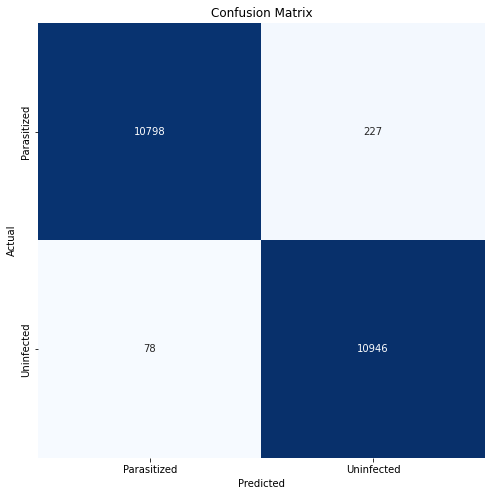



Classification Report

              precision    recall  f1-score   support

 Parasitized       0.99      0.98      0.99     11025
  Uninfected       0.98      0.99      0.99     11024

    accuracy                           0.99     22049
   macro avg       0.99      0.99      0.99     22049
weighted avg       0.99      0.99      0.99     22049

Recall of the model is 0.99
Precision of the model is 0.98
F-1 Score of the model is 0.99


In [ ]:
evaluate(model2)

In [ ]:
import matplotlib.pyplot as plt
def eval_plot(history2):

  plt.figure(figsize=(14, 5))

  # Accuracy plot
  plt.subplot(1, 2, 1)
  acc = history2.history['accuracy']
  val_acc = history2.history['val_accuracy']
  epochs = range(len(acc))
  acc_plot, = plt.plot(epochs, acc, 'r')
  val_acc_plot, = plt.plot(epochs, val_acc, 'b')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

  # Loss plot
  plt.subplot(1, 2, 2)
  loss = history2.history['loss']
  val_loss = history2.history['val_loss']
  epochs = range(len(loss))
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'b')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

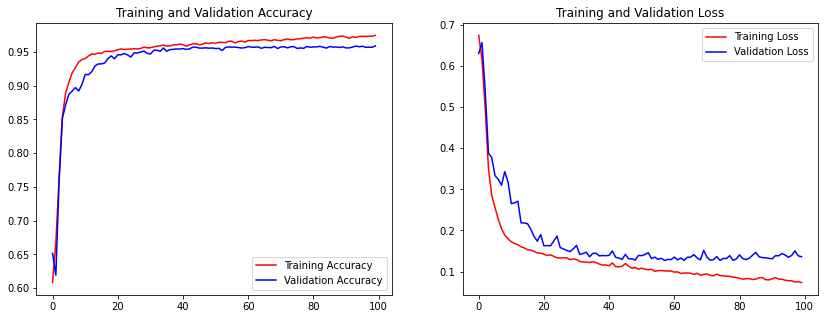

In [ ]:
eval_plot(history2)

In [ ]:
model2.save_weights("Nadam1.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# serialize model to JSON
model2_json = model2.to_json()
with open("Nadam1.json", "w") as json_file: json_file.write(model2_json)

In [ ]:
# serialize weights to HDF5
model2.save("Nadam1.h5")
print("Saved model to disk")

Saved model to disk


Model : Nadam1.h5
Predicted Label : Parasitized
Probability : 0.0032



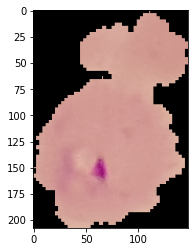

In [ ]:
from PIL import Image
import cv2

img_upload = Image.open("/content/Tubes-ML/Dataset/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png")
img_plt = plt.imshow(img_upload)
img = np.array(img_upload)
img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)

model_list = ['/content/Nadam1.h5']
labels = ['Parasitized','Uninfected']

for m in model_list:
    model = load_model(m)
    imgs = cv2.resize(img, (64,64))
    imgs = imgs.astype('float32') / 255
    pred = model.predict(np.expand_dims(imgs, axis=0))[0]
    print('Model :', m.split('/')[-1])
    print('Predicted Label :',labels[((pred > 0.5)+0).ravel()[0]])
    print('Probability :',[ round(elem, 4) for elem in pred ][0])
    print('===============\n')

Model : Nadam1.h5
Predicted Label : Uninfected
Probability : 0.9773



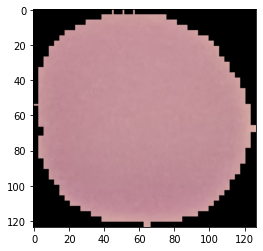

In [ ]:
from PIL import Image
import cv2

img_upload = Image.open("/content/Tubes-ML/Dataset/Uninfected/C114P75ThinF_IMG_20150930_150733_cell_62.png")
img_plt = plt.imshow(img_upload)
img = np.array(img_upload)
img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)

model_list = ['/content/Nadam1.h5']
labels = ['Parasitized','Uninfected']

for m in model_list:
    model = load_model(m)
    imgs = cv2.resize(img, (64,64))
    imgs = imgs.astype('float32') / 255
    pred = model.predict(np.expand_dims(imgs, axis=0))[0]
    print('Model :', m.split('/')[-1])
    print('Predicted Label :',labels[((pred > 0.5)+0).ravel()[0]])
    print('Probability :',[ round(elem, 4) for elem in pred ][0])
    print('===============\n')

SKENARIO 3 RMSPROP 

In [ ]:
# TULIS KODE ANDA DISINI
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Print model summary
print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 31, 31, 16)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 31, 31, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 16)        2320      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 16)      

In [ ]:
# Compile model
from tensorflow.keras.optimizers import RMSprop

model3.compile(optimizer=RMSprop(lr=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history3 = model3.fit(train_generator,
                   epochs = 100,
                   validation_data = valid_generator,
                   callbacks=[tf.keras.callbacks.ReduceLROnPlateau(
                       monitor='val_loss',
                       factor=0.5,
                       patience=40,
                       verbose = 1,
                       mode= 'auto',
                       cooldown = 1
                   )])

Epoch 1/100
690/690 [==============================] - 34s 47ms/step - loss: 0.6661 - accuracy: 0.6151 - val_loss: 0.6958 - val_accuracy: 0.5780 - lr: 1.0000e-04
Epoch 2/100
690/690 [==============================] - 32s 47ms/step - loss: 0.5907 - accuracy: 0.6921 - val_loss: 0.7859 - val_accuracy: 0.6066 - lr: 1.0000e-04
Epoch 3/100
690/690 [==============================] - 33s 47ms/step - loss: 0.4967 - accuracy: 0.7606 - val_loss: 0.7516 - val_accuracy: 0.6945 - lr: 1.0000e-04
Epoch 4/100
690/690 [==============================] - 33s 48ms/step - loss: 0.3708 - accuracy: 0.8368 - val_loss: 0.6626 - val_accuracy: 0.7638 - lr: 1.0000e-04
Epoch 5/100
690/690 [==============================] - 33s 48ms/step - loss: 0.2919 - accuracy: 0.8826 - val_loss: 0.5351 - val_accuracy: 0.8103 - lr: 1.0000e-04
Epoch 6/100
690/690 [==============================] - 33s 47ms/step - loss: 0.2483 - accuracy: 0.9070 - val_loss: 0.4660 - val_accuracy: 0.8404 - lr: 1.0000e-04
Epoch 7/100
690/690 [=======

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate(model3):
  valid_generator = train_datagen.flow_from_directory(
      TRAIN_DIR, 
      target_size=(64,64), 
      batch_size=32, 
      class_mode='binary',
      shuffle = False)

  batch_size = 32
  num_of_test_samples = len(str(valid_generator.filenames))

  Y_pred = model3.predict_generator(valid_generator)
  y_pred = np.round(Y_pred).astype(int)

  print('\nConfusion Matrix\n')
  cm = confusion_matrix(valid_generator.classes, y_pred)
  plt.figure(figsize=(8, 8))
  sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
  plt.xticks(ticks=[0.5, 1.5], labels=['Parasitized','Uninfected'])
  plt.yticks(ticks=[0.5, 1.5], labels=['Parasitized','Uninfected'])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  print('\n\nClassification Report\n')
  target_names = ['Parasitized','Uninfected']
  print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

  tn, fp, fn, tp = cm.ravel()

  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f = 2*((precision*recall)/(precision+recall))

  print("Recall of the model is {:.2f}".format(recall))
  print("Precision of the model is {:.2f}".format(precision))
  print("F-1 Score of the model is {:.2f}".format(f)) 

Found 22049 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  app.launch_new_instance()



Confusion Matrix



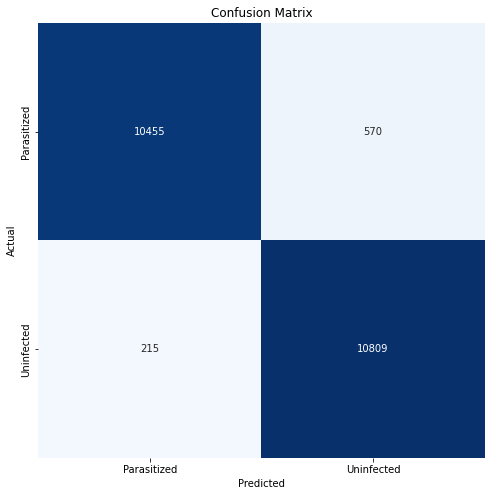



Classification Report

              precision    recall  f1-score   support

 Parasitized       0.98      0.95      0.96     11025
  Uninfected       0.95      0.98      0.96     11024

    accuracy                           0.96     22049
   macro avg       0.96      0.96      0.96     22049
weighted avg       0.96      0.96      0.96     22049

Recall of the model is 0.98
Precision of the model is 0.95
F-1 Score of the model is 0.96


In [ ]:
evaluate(model3)

In [ ]:
import matplotlib.pyplot as plt
def eval_plot(history3):

  plt.figure(figsize=(14, 5))

  # Accuracy plot
  plt.subplot(1, 2, 1)
  acc = history3.history['accuracy']
  val_acc = history3.history['val_accuracy']
  epochs = range(len(acc))
  acc_plot, = plt.plot(epochs, acc, 'r')
  val_acc_plot, = plt.plot(epochs, val_acc, 'b')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

  # Loss plot
  plt.subplot(1, 2, 2)
  loss = history3.history['loss']
  val_loss = history3.history['val_loss']
  epochs = range(len(loss))
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'b')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

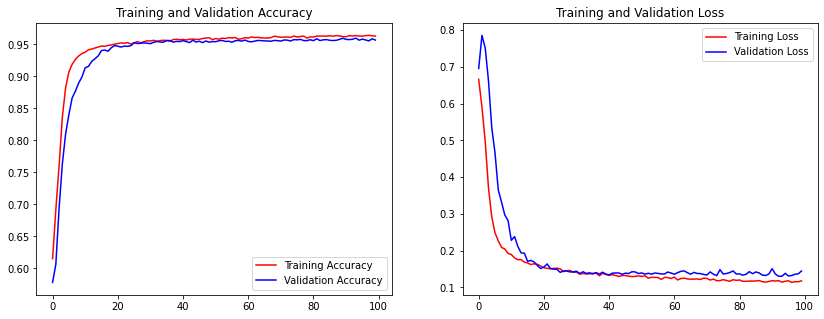

In [ ]:
eval_plot(history3)

In [ ]:
model3.save_weights("Rmsprop1.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# serialize model to JSON
model3_json = model3.to_json()
with open("Rmsprop1.json", "w") as json_file: json_file.write(model3_json)

In [ ]:
# serialize weights to HDF5
model3.save("Rmsprop1.h5")
print("Saved model to disk")

Saved model to disk


Model : Rmsprop1.h5
Predicted Label : Parasitized
Probability : 0.0094



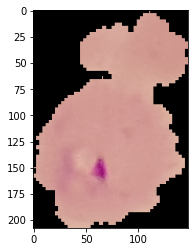

In [ ]:
from PIL import Image
import cv2

img_upload = Image.open("/content/Tubes-ML/Dataset/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png")
img_plt = plt.imshow(img_upload)
img = np.array(img_upload)
img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)

model_list = ['/content/Rmsprop1.h5']
labels = ['Parasitized','Uninfected']

for m in model_list:
    model = load_model(m)
    imgs = cv2.resize(img, (64,64))
    imgs = imgs.astype('float32') / 255
    pred = model.predict(np.expand_dims(imgs, axis=0))[0]
    print('Model :', m.split('/')[-1])
    print('Predicted Label :',labels[((pred > 0.5)+0).ravel()[0]])
    print('Probability :',[ round(elem, 4) for elem in pred ][0])
    print('===============\n')

Model : Rmsprop1.h5
Predicted Label : Uninfected
Probability : 0.8755



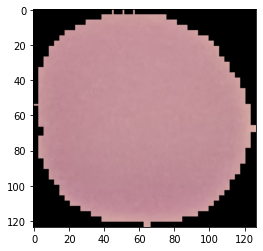

In [ ]:
from PIL import Image
import cv2

img_upload = Image.open("/content/Tubes-ML/Dataset/Uninfected/C114P75ThinF_IMG_20150930_150733_cell_62.png")
img_plt = plt.imshow(img_upload)
img = np.array(img_upload)
img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)

model_list = ['/content/Rmsprop1.h5']
labels = ['Parasitized','Uninfected']

for m in model_list:
    model = load_model(m)
    imgs = cv2.resize(img, (64,64))
    imgs = imgs.astype('float32') / 255
    pred = model.predict(np.expand_dims(imgs, axis=0))[0]
    print('Model :', m.split('/')[-1])
    print('Predicted Label :',labels[((pred > 0.5)+0).ravel()[0]])
    print('Probability :',[ round(elem, 4) for elem in pred ][0])
    print('===============\n')